In [280]:
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib import rcParams
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
rcParams['axes.linewidth']=2
rcParams['text.usetex']=True#True
#path = "/home/jalil/Projects2023/TDNEGF/TDNEGF/data/"

In [286]:
name1 = 'around_x'#'NiPt3_nosoc'#'NiPt15_nosoc'#"curr_gene2_soc" ## test
cspins_f = np.loadtxt(f"./data/cspins_{name1}_jl.txt" )
sneq_f = np.loadtxt(f"./data/sneq_{name1}_jl.txt" )
seq_f = np.loadtxt(f"./data/seq_{name1}_jl.txt" )
sc_f = np.loadtxt(f"./data/sc_{name1}_jl.txt" )
cc_f = np.loadtxt(f"./data/cc_{name1}_jl.txt" ) ;
#ent_f = np.loadtxt(f"./data/entropy_{name1}_sl_jl.txt"  ) 
#spin liquid data
#sden_sl_f = np.loadtxt(f"./data/sden_{name1}_sl_jl.txt" )  

In [287]:
#cc_f[8000:8000+6280*2,1].mean()

In [288]:
#cc_f[8000:8000+6280*2,1].mean()

In [289]:
def fourier_transform(times,data,dt):
    """ This function calculates the FFT tranformation of a set of data
    """
    from scipy.fft import fft, fftfreq ### Import functions to make the FFT
    N = times.size                     ### Calculate the size of the data set
    # This computes the complex Fourier coeffients, representing
    #  the amplitude and phase information for each frquency
    yif = np.fft.fft(data)             ### Apply the FFT algorithm to the data 
    yf = abs(yif[0:N//2])              ### We only consider the first half of the spectrum
                                       ### since the FFT output is symmetric due to the propt.
                                       ### of real input signals
    yf= (2/N)*yf                       ### Normalice the amplitudes and the factor of two 
                                       ### accounts for the symmetry in the spectrum are properly scaled 
    # This Calculates the optimal frequencies based on the number of data points and the time interval 
    # between consecutive points
    xf = np.fft.fftfreq(N,dt)[0:N//2]  ### Generates the correspoding frqeuncy values for each data point 
    return xf, yf

# TDNEGF data

(-0.001, 0.001)

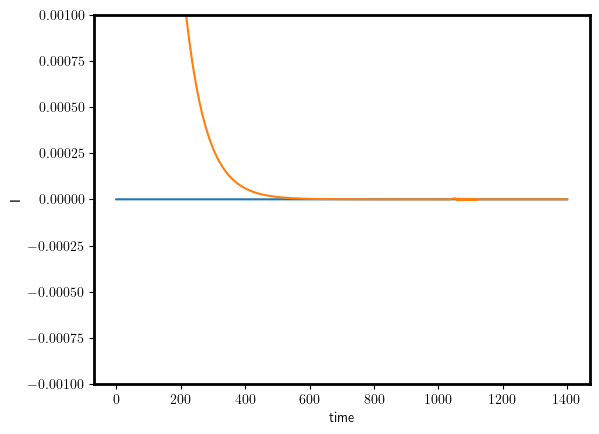

In [290]:
fig,axs = plt.subplots(1,1)
#plt.plot(data[f"cspins_f_{name1}"][:,0],data[f"cspins_f_{name1}"][:,13])
axs.plot(cc_f[:,0],cc_f[:,1])
axs.plot(cc_f[:,0],cc_f[:,2])
#axs.plot(cc_f[:,0],cc_f[:,3])
axs.set_ylabel("I")
axs.set_xlabel("time")
#axs.set_ylim([-0.1,0.1])
#axs.axhline(0.)
plt.ylim([-1e-3,1e-3])
#plt.xlim([4900,5100])

(1000.0, 1200.0)

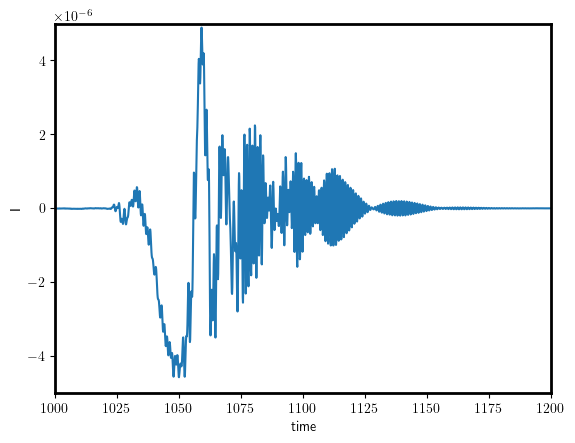

In [310]:
fig,axs = plt.subplots(1,1)
#plt.plot(data[f"cspins_f_{name1}"][:,0],data[f"cspins_f_{name1}"][:,13])
axs.plot(cc_f[:,0],-cc_f[:,2])
# axs.plot(cc_f[:,0],cc1_f[:,2],color='yellow')
# axs.plot(cc_f[:,0],cc2_f[:,2],color='red',alpha=0.5)
#axs.plot(cc_f[:,0],cc_f[:,2])
#axs.plot(cc_f[:,0],cc_f[:,3])
axs.set_ylabel("I")
axs.set_xlabel("time")
#axs.set_ylim([-0.1,0.1])
#axs.axhline(0.)
plt.ylim([-5e-6,5e-6])
plt.xlim([1000,1200])
#plt.xlim([4980,5200])

In [294]:
# fig,axes=plt.subplots(1,1,figsize=(14,7) )
# #axes=axes.reshape(2)
# fig.subplots_adjust(wspace=0.25, hspace=0.15)

# ti=50000
# tf=50800
# delta =tf-ti

# W1,F1 = fourier_transform(cc_f[0:delta,0]*0.95,cc_f[ti:tf,2], 0.1)
# W1 = W1[::1]*1000#*omega#/(2*np.pi)#*T1 
# axes.plot(W1[::1],F1[::1],ls ='-',color='grey',markeredgecolor ='black',lw=3,mfc='white',ms=5)

# W1,F1 = fourier_transform(cc1_f[0:delta,0]*0.95,cc1_f[ti:tf,2], 0.1)
# W1 = W1[::1]*1000#*omega#/(2*np.pi)#*T1 
# axes.plot(W1[::1],F1[::1],ls =':',color='blue',markeredgecolor ='black',lw=2,mfc='white',ms=5)

# W1,F1 = fourier_transform(cc2_f[0:delta,0]*0.95,cc2_f[ti:tf,2], 0.1)
# W1 = W1[::1]*1000#*omega#/(2*np.pi)#*T1 
# axes.plot(W1[::1],F1[::1],ls ='-.',color='yellow',markeredgecolor ='black',lw=1,mfc='white',ms=5)

# plt.xlim([0.,1000])
#plt.ylim([0.0,0.5e-12])

#axes.set_yscale('log')

#plt.xlim([0,300])

(-0.01, 0.01)

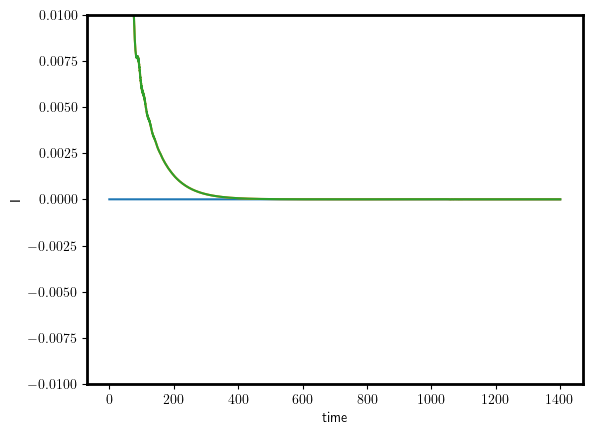

In [295]:
fig,axs = plt.subplots(1,1)
#plt.plot(data[f"cspins_f_{name1}"][:,0],data[f"cspins_f_{name1}"][:,13])
axs.plot(cc_f[:,0],cc_f[:,1])
axs.plot(cc_f[:,0],cc_f[:,2])
axs.plot(cc_f[:,0],cc_f[:,3])
axs.set_ylabel("I")
axs.set_xlabel("time")
#axs.set_ylim([-0.1,0.1])
plt.ylim([-1e-2,1e-2])

In [236]:
np.concatenate((cc_f[:,3] ,cc1_f[:,3]) )

array([1.93430714e+00, 3.57758722e+00, 4.73827780e+00, ...,
       3.56339501e-05, 3.55630082e-05, 3.54917331e-05])

(-0.01, 0.01)

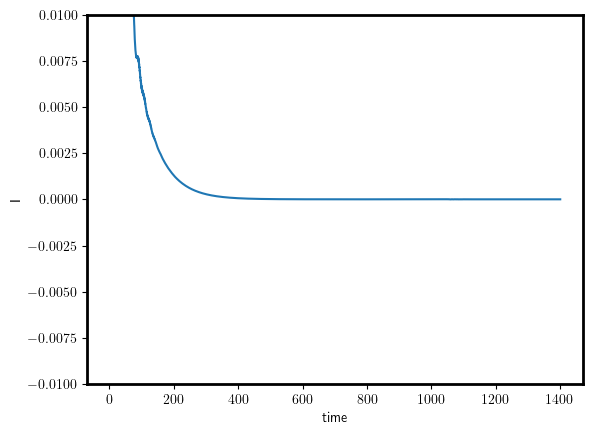

In [296]:
fig,axs = plt.subplots(1,1)
#plt.plot(data[f"cspins_f_{name1}"][:,0],data[f"cspins_f_{name1}"][:,13])
axs.plot(cc_f[:,0],cc_f[:,2])
#axs.plot(cc_f[:,0],cc_f[:,2])
#axs.plot(np.concatenate((cc_f[:,3] ,cc1_f[:,3]) ))
axs.set_ylabel("I")
axs.set_xlabel("time")
axs.set_ylim([-0.1,0.1])
#plt.xlim([990,1020])
plt.ylim([-1e-2,1e-2])

(1000.0, 1100.0)

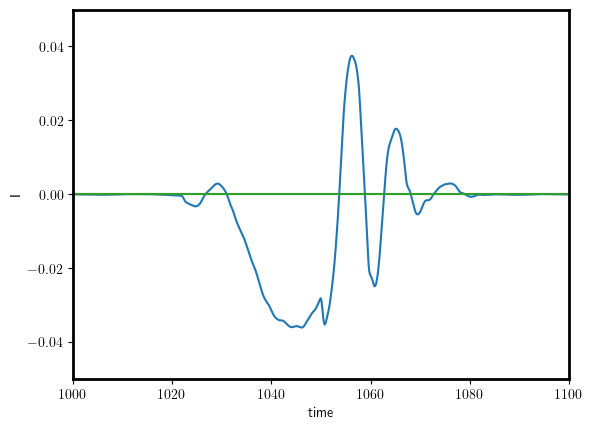

In [309]:
fig,axs = plt.subplots(1,1)
#plt.plot(data[f"cspins_f_{name1}"][:,0],data[f"cspins_f_{name1}"][:,13])
axs.plot(sc_f[:,0],sc_f[:,1])
axs.plot(sc_f[:,0],sc_f[:,2])
axs.plot(sc_f[:,0],sc_f[:,3])
axs.set_ylabel("I")
axs.set_xlabel("time")
#axs.set_ylim([-1e-1,1e-1])
#axs.set_ylim([-1e-2 +0.5,1e-2+0.5])
#axs.set_ylim([0.4554,0.4556])
plt.ylim([-5e-2,5e-2])
plt.xlim([1000,1100])
#plt.xlim([5000,5100])


Text(0.5, 0, 'time')

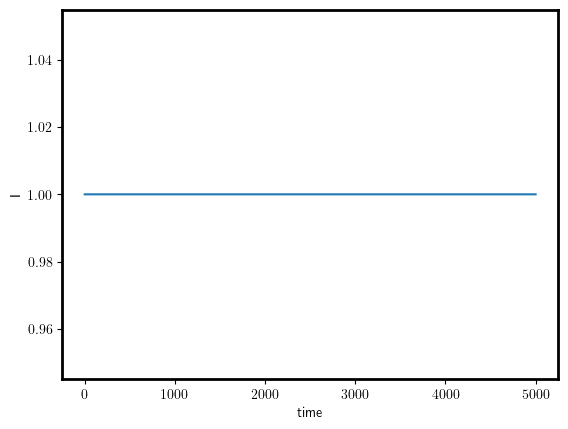

In [239]:
fig,axs = plt.subplots(1,1)
#plt.plot(data[f"cspins_f_{name1}"][:,0],data[f"cspins_f_{name1}"][:,13])
#axs.plot(cspins_f[:,0],cspins_f[:,1])
#axs.plot(cspins_f[:,0],cspins_f[:,2])
axs.plot(cspins_f[:,0],cspins_f[:,3])
axs.set_ylabel("I")
axs.set_xlabel("time")
#plt.xlim([0,100])

#plt.plot(cspins_f[:,1]**2 + cspins_f[:,2]**2 + cspins_f[:,3]**2 )

Text(0.5, 0, 'time')

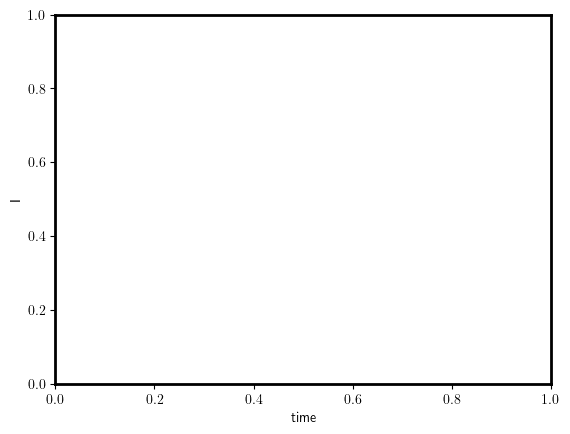

In [240]:
fig,axs = plt.subplots(1,1)
#plt.plot(data[f"cspins_f_{name1}"][:,0],data[f"cspins_f_{name1}"][:,13])
#axs.plot(seq_f[:,0],seq_f[:,1])
#axs.plot(seq_f[:,0],seq_f[:,2])
#axs.plot(seq_f[:,0],seq_f[:,3])
axs.set_ylabel("I")
axs.set_xlabel("time")

Text(0.5, 0, 'time')

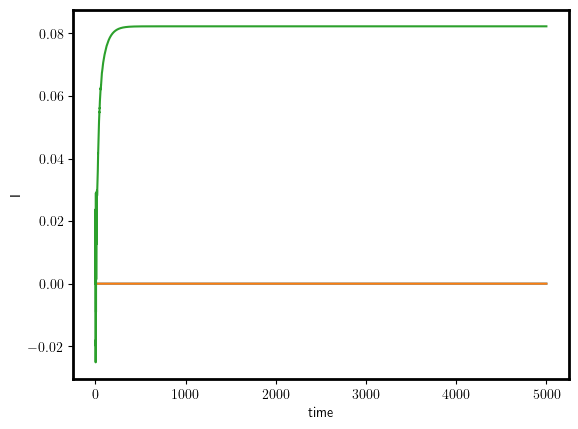

In [241]:
fig,axs = plt.subplots(1,1)
#plt.plot(data[f"cspins_f_{name1}"][:,0],data[f"cspins_f_{name1}"][:,13])
axs.plot(sneq_f[:,0],sneq_f[:,1])
axs.plot(sneq_f[:,0],sneq_f[:,2])
axs.plot(sneq_f[:,0],sneq_f[:,3])

#plt.ylim([-16e-3,16e-3])
#plt.xlim([5000,5100])


axs.set_ylabel("I")
axs.set_xlabel("time")

In [242]:
# fig,axs = plt.subplots(1,1)
# #plt.plot(data[f"cspins_f_{name1}"][:,0],data[f"cspins_f_{name1}"][:,13])

# axs.plot(np.concatenate((sneq_f[:,3] ,sneq1_f[:,3] )))

# #plt.xlim([990,1020])


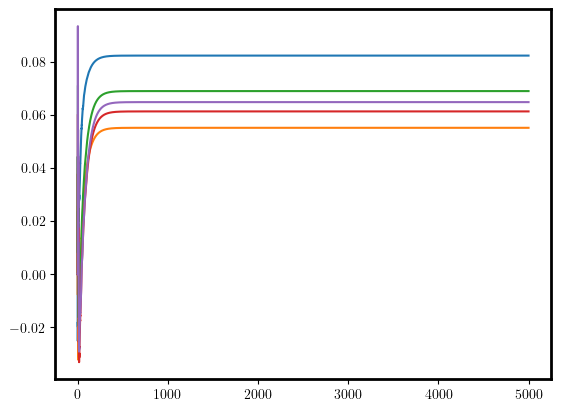

In [243]:
fig,axs = plt.subplots(1,1)
axs.plot(sneq_f[:,0],sneq_f[:,3])
axs.plot(sneq_f[:,0],sneq_f[:,6])
axs.plot(sneq_f[:,0],sneq_f[:,9])
axs.plot(sneq_f[:,0],sneq_f[:,12])
axs.plot(sneq_f[:,0],sneq_f[:,15])
#axs.plot(sneq_f[:,0],sneq_f[:,18])


# axs.plot(sneq_f[:,0],sneq_f[:,21])
# axs.plot(sneq_f[:,0],sneq_f[:,24])
# axs.plot(sneq_f[:,0],sneq_f[:,27])

# Spin liquid data

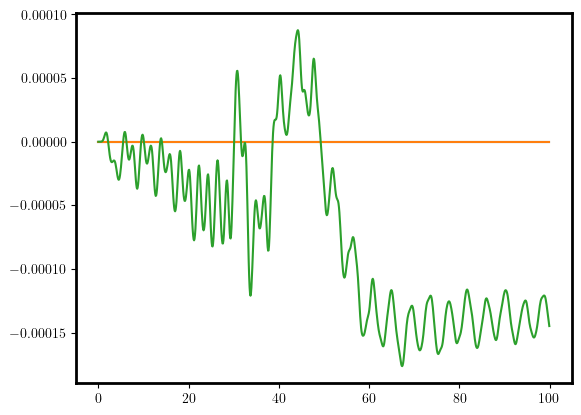

In [340]:
plt.plot(sden_sl_f[:,0], sden_sl_f[:,19])
plt.plot(sden_sl_f[:,0], sden_sl_f[:,20])
plt.plot(sden_sl_f[:,0], sden_sl_f[:,21])
#plt.plot(sden_sl_f[:,0], sden_sl_f[:,24])

In [227]:
#sden_sl_f[:,6]

3
6
9
12
15
18
21
24
27
30


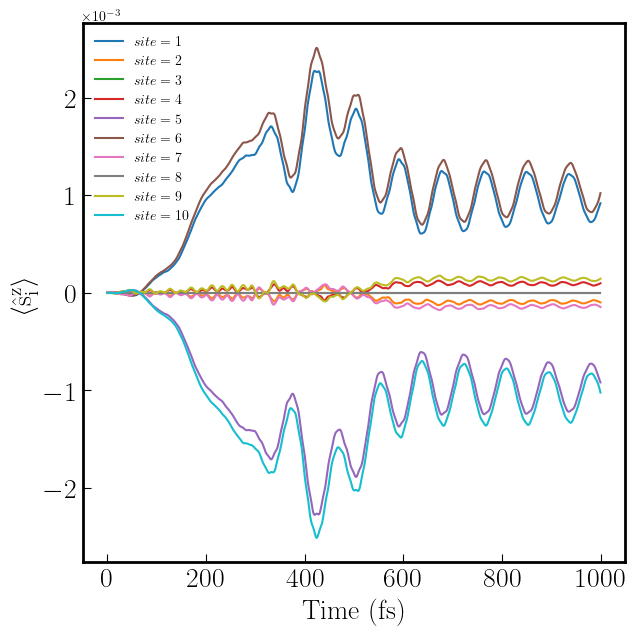

In [341]:
#sz_sden_pos = [sden_sl_f[:,i] for i in range(3,6,3) ]
#plt.plot(sden_sl_f[:,1],sz_sden_pos )
fig,axes=plt.subplots(1,1,figsize=(7,7))
fs =20
for i in range(3,31,3):
    print(i)
    plt.plot(sden_sl_f[:,i],label=f"$site={i//3}$")
plt.legend()  
axes.ticklabel_format(axis="y", style="sci", scilimits=(-1,2), useMathText=True)
axes.ticklabel_format(axis="y", style="sci", scilimits=(-1,2), useMathText=True)
axes.tick_params(axis='both', which='both', labelsize=fs,direction='in', length=6)
axes.set_ylabel(r'$\mathrm{\langle \hat s^z_i \rangle}$',fontsize=fs)
axes.set_xlabel(r'$\mathrm{Time\ (fs)}$',fontsize=fs)
#axes.set_ylim([-0.1,1.2])
axes.legend(frameon=False)

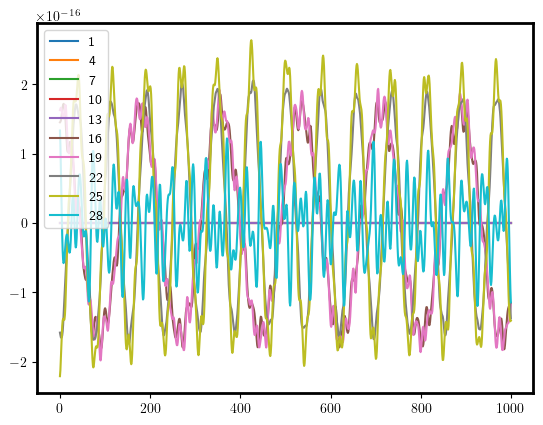

In [342]:
for i in range(1,31,3):
    plt.plot(sden_sl_f[:,i],label=f"{i}")
plt.legend()  

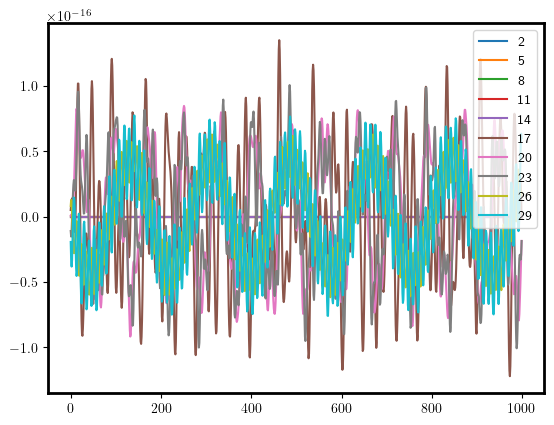

In [343]:
for i in range(2,31,3):
    plt.plot(sden_sl_f[:,i],label=f"{i}")
plt.legend()  

In [185]:
for i in range(3,31,3):
    print(i)

3
6
9
12
15
18
21
24
27
30


In [161]:
sden_sl_f.shape

(1000, 31)

In [162]:
ent_f

array([[ 0.        ,  0.33789455],
       [ 0.1       ,  0.33789455],
       [ 0.2       ,  0.33789455],
       ...,
       [99.7       ,  0.33789442],
       [99.8       ,  0.33789436],
       [99.9       ,  0.33789429]])

Text(0.5, 0, 'time')

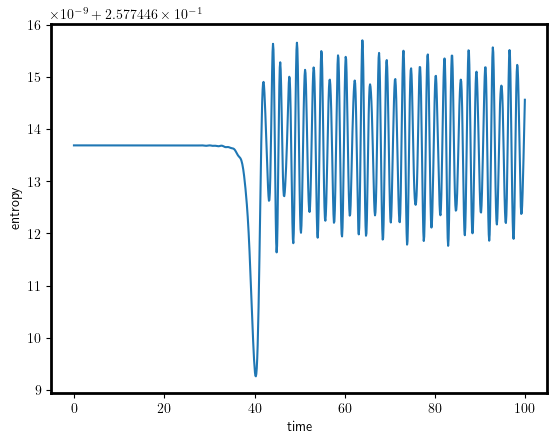

In [284]:
fig,ax = plt.subplots(1,1)
ax.plot(ent_f[:,0],ent_f[:,1])
ax.set_ylabel("entropy")
ax.set_xlabel("time")


In [704]:
range(4,3,31)

range(4, 3, 31)

In [387]:
3*np.pi/2

4.71238898038469